<a href="https://colab.research.google.com/github/bfdefraga/projetos-portfolio-/blob/main/Projeto_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE EXPLORATÓRIA DE DADOS EM SQL**

# 1. Contextualização

A presente análise visa demonstrar de forma estruturada como é realizada a exploração de dados com linguagem **SQL** dentro da plataforma **Athena AWS**. Para isso, será utilizado um banco de dados em que consta diversas informações do perfil dos clientes.

# 2. Dados

Inicialmente, realizou-se a extração dos dados com uma versão disponível a partir do ([link](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset)) e armazenados em um arquivo do tipo .csv. Após, esse arquivo foi armazenado em um diretório dentro da plataforma **S3 Bucket AWS** a fim de executar a exploração dos dados.

### 2.1 Exploração dos Dados

A fim de conhecer os dados disponíveis, uma tabela é gerada dentro do Athena com todas as variáveis analisadas a partir de comandos em SQL. Os dados contidos nesse arquivo são referentes aos clientes de um banco e são organizados pelas seguintes colunas:



```
idade = idade do cliente
sexo = sexo do cliente (F ou M)
dependentes = número de dependentes do cliente
escolaridade = nível de escolaridade do clientes
salario_anual = faixa salarial do cliente
tipo_cartao = tipo de cartao do cliente
qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
meses_inativo_12m = quantidade de meses que o cliente ficou inativo
limite_credito = limite de credito do cliente
valor_transacoes_12m = valor das transações dos ultimos 12 meses
qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses
```



**Geração da tabela.**

**Query:**

```
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito(
	idade int,
	sexo string,
	dependentes int,
	escolaridade string,
	estado_civil string,
	salario_anual string,
	tipo_cartao string,
	qtd_produtos bigint,
	iteracoes_12m int,
	meses_inativo_12m int,
	limite_credito float,
	valor_transacoes_12m float,
	qtd_transacoes_12m int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES(
	'serialization.format' = ',',
	'field.delim' = ','
)
LOCATION 's3://credito-projeto-brunoff/'
TBLPROPERTIES('classification' = 'csv');
```




Amostra das 10 primeiras linhas.

**Query:**

```
SELECT * FROM "default"."credito" limit 10;
```



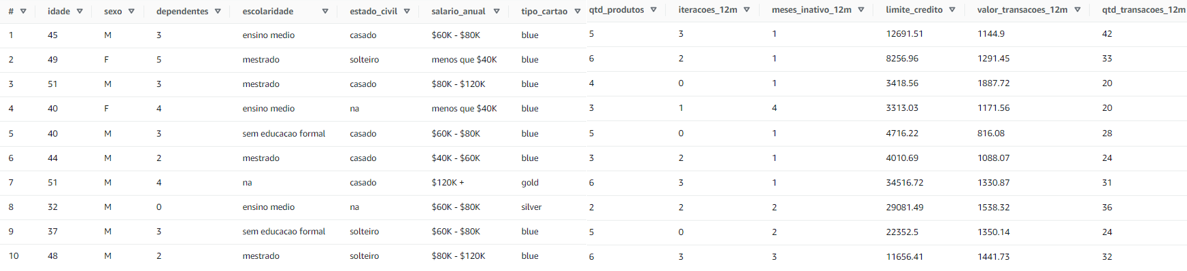

**NOTA:** é possível oberservar que há informações classificadas como "na", o que indica dados nulos.

### 2.2 Conhecendo os Dados

Nessa etapa, verifica-se, por meio de comandos SQL, os tipos de respostas às variáveis categóricas.

*Importante:* como os outputs gerados dentro do Athena não são replicáveis nessa plataforma, disponibiliza-se as imagens das consultas realizadas para melhor compreensão dos comandos utilizados.

Tamanho da base de dados

**Query:**

```
SELECT count(*) FROM credito
```



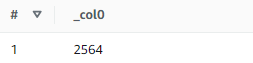

A base da dados possui 2.564 linhas.

Tipos de dados

**Query:**

```
DESCRIBE credito
```



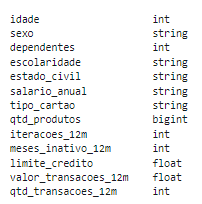

Aqui, cada coluna representa uma variável e o tipo de dado armazenado nela.

Níveis de escolaridade

**Query:**

```
SELECT distinct escolaridade from credito
```



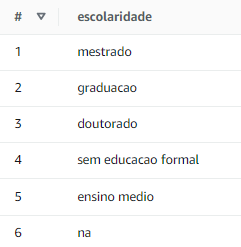

Observamos que há 6 níveis de escolaridade, com um tipo representando os dados nulos.

Estado civil

**Query:**

```
SELECT distinct estado_civil from credito
```



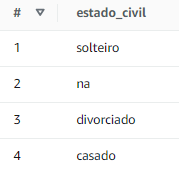

Há 3 tipos de resposta, além da que representa os valores nulos que aparecem novamente.

Tipos de cartão

**Query:**



```
SELECT distinct tipo_cartao from credito
```



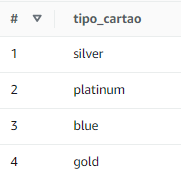

Aqui não há a presença de valores nulos.

Salário

**Query:**


```
SELECT distinct salario_anual from credito
```



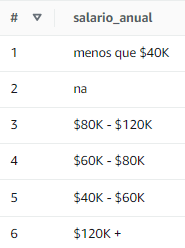

O salário aqui exposto é dividido por faixa salarial, e não com valor exato. E contém tambem valores nulos. Para facilitar a abordagem desses dados, podemos classificar as faixas salariais por grupo de renda, onde:

```
- renda baixa: menos de $40K;
- renda média-baixa:$40K-$60K;
- renda média: $60K-$80K;
- renda média-alta: $80K-$120K;
- renda alta: mais de $120K.
```



### 2.3 Análise dos Dados

Nessa etapa, são realizads uma série de consultas com SQL cruzando diversas variáveis com o objetivo de ofertar importantes informações de negócio ao banco em relação aos perfis de seus clientes. Essas informações podem ser usadas por diversos setores do banco como o setor de marketing e o setor financeiro, para citar alguns. dessa forma campanhas e carteiras de serviço podem ser ofertadas com melhor engajamento junto ao público alvo.

NÚMERO DE CLIENTES POR FAIXA SALARIAL ANUAL

**Query:**

```
select count(*), salario_anual from credito group bysalario_anual
```



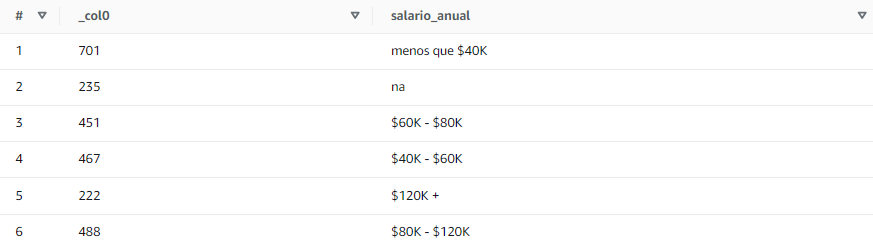

**Insight:** O grupo isolado com maior número de clientes possui renda baixa, entretanto, os grupos de renda média-baixa e renda média concentram juntos o maior número de clientes, 908 clientes, e representam 63,14% dos clientes do banco. Além disso, os clientes de renda média-alta também representam um segmento significativo de clientes, o que pode requerer uma abordagem de mercado diferenciada.

NÚMERO DE CLIENTES POR CATEGORIA DE CARTÃO DE CRÉDITO

**Query:**

```
select count(*), tipo_cartao from credito group by tipo_cartao
```



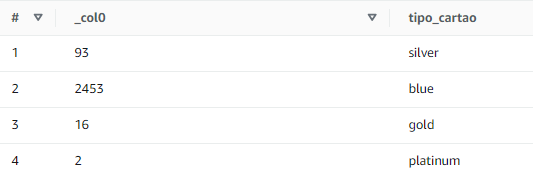

**Insight:** O grupo de maior representação é o com cartão "Blue".

NÚMERO DE CLIENTES POR SEXO

**Query:**

```
select count(*), sexo from credito group by sexo
```



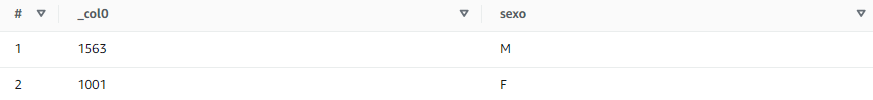

**Insight:** Os homens representam o maior grupo de clientes. Essa informação é importante haja vista as diferenças comportamentais de consumo entre homens e muheres, o que pode requerer abordagens diferentes na oferta de serviços.

IDADE MÉDIA, MÍNIMA E MÁXIMA DOS CLIENTES POR SEXO

**Query:**

```
SELECT avg(idade) as media_idade, min(idade) as
min_idade, max(idade) as
max_idade, sexo
from credito
group by sexo
```



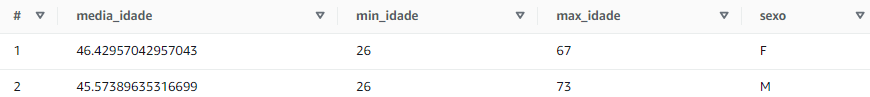

**Insight:** Não há diferença significativa de idade entre os grupos de clientes por sexo. De forma geral, uma estratégia baseada nessa informação agregaria pouco valor de venda.

QUANTIDADE MÍNIMA E MÁXIMA DE TRANSAÇÕES DOS CLIENTES EM 12 MESES

**Query:**

```
select min(qtd_transacoes_12m), max(qtd_transacoes_12m) from credito
```



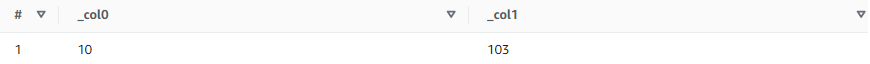

**Insight:** A movimentação financeira dos clientes é bem ampla e representa um contato frequente com os serviçoes do banco.

TRANSAÇÕES DE MENOR E MAIOR VALOR EM 12 MESES

**Query:**

```
select min(valor_transacoes_12m), max(valor_transacoes_12m) from credito
```



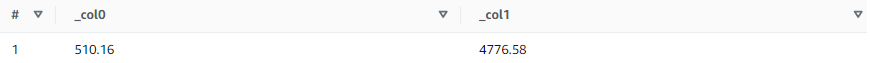

**Insight:** Nessa abordagem, também se verifica uma ampla diferença nos valores transicionados.

RELAÇÃO ENTRE OS MAIORES LIMITES DE CRÉDITO COM A ESCOLARIDADE E O SEXO DOS CLIENTES

**Query:**
```
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao !='na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
```



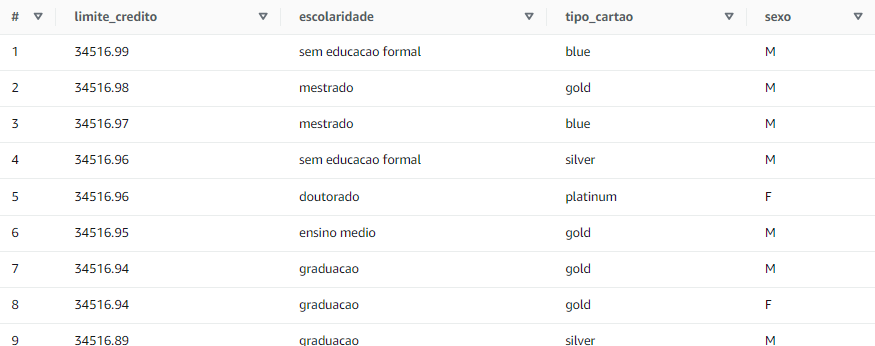

**Insight:** Aqui percebe-se que os homens com escolaridade em nível superior representam de forma geral o grupo com maiores limites de crédito junto ao banco. Embora a escolaridade aponte uma tendência, ela não é determinante, pois há clientes sem educação formal e com limite alto. Além disso, não parece haver relação entre o tipo de cartão e o limite disponibilizado.  

RELAÇÃO ENTRE OS MENORES LIMITES DE CRÉDITO COM A ESCOLARIDADE E O SEXO DOS CLIENTES

**Query:**


```
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito asc
```



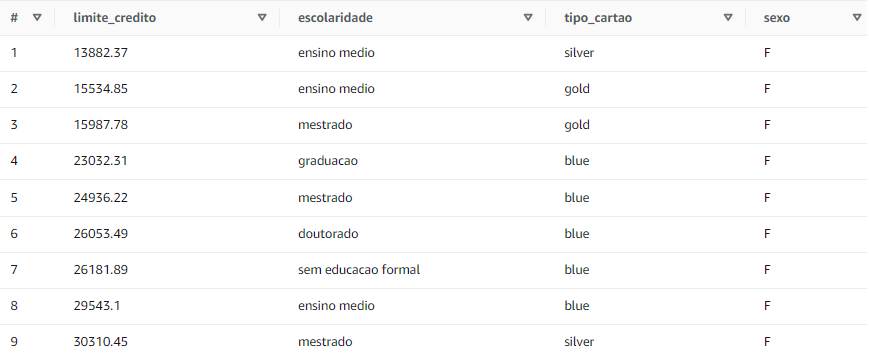

**Insight:** Já em relação aos menores limites de crédito, as mulheres compõe majoritariamente esse grupo e a escolaridade foi diversa, o que parece não influenciar esses dados. Além disso, não há clientes com cartão do tipo Platinum entre os menores limites.

RETORNA MAIOR, MENOR E MÉDIO VALOR POR SEXO

RELAÇÃO DO GASTO MÉDIO, MÍNIMO E MAIOR DOS CLIENTES POR SEXO

**Query:**
```
select max(valor_transacoes_12m) as maior_valor_gasto, avg (valor_transacoes_12m) as

media_valor_gasto, min(valor_transacoes_12m) as

minimo_valor_gasto,

sexo from credito

where escolaridade != 'na' and tipo_cartao !='na'

group by sexo
```

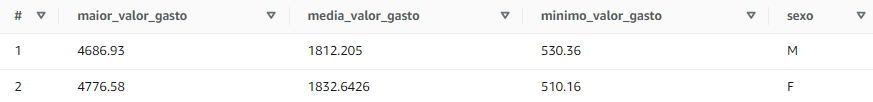

**Insight:** Nessa abordagem, verificamos o padrão de comportamento dos gastos liderado pelas mulheres, embora tenha uma média levemente maior que os homens. Nesse sentido, é importante avaliar se há necessidade real de criar estratégias de vendas segmentadas com esse indicador, o que não parece ser o caso.

RELAÇÃO ENTRE A FAIXA SALARIAL COM AS MÉDIAS DE LIMITE DE CRÉDITO DE VALOR DAS TRANSAÇÕES DOS CLIENTES POR SEXO

**Query:**
```
select avg(qtd_produtos) as qts_produtos,

avg(valor_transacoes_12m) as media_valor_transacoes,

avg(limite_credito) as media_limite,

sexo, salario_anual from credito

where salario_anual != 'na'

group by sexo, salario_anual

order by avg(valor_transacoes_12m) desc
```



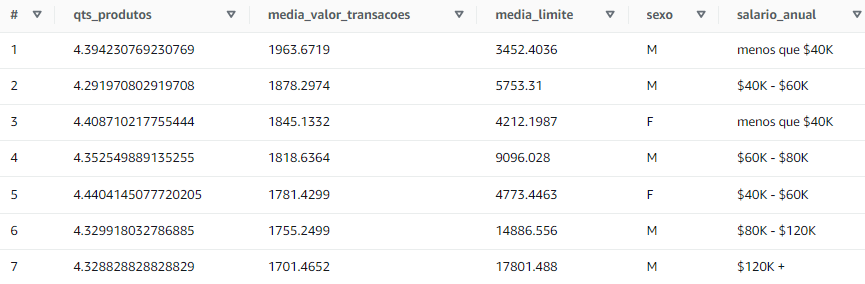

**Insight:** Aqui, percebe-se que os valores médios dos limites apresentam relação direta com a renda, pois quanto maior a renda, maior será o limite de crédito. Quanto a renda, não há presença de clientes mulheres na faixa salarial a partir dos $60K.

### 2.4 Apresentação dos Dados

A visualização dos dados coletados por meio de consultas SQL no Athena AWS, e que apresentaram relevância, serão apresentados em um **Dashboard** para ficarem melhor dispostos. Para isso, utilizou-se o **Looker Studio** da Google alimentado pelos arquivo do tipo '.csv' gerados com as consultas no Athena.

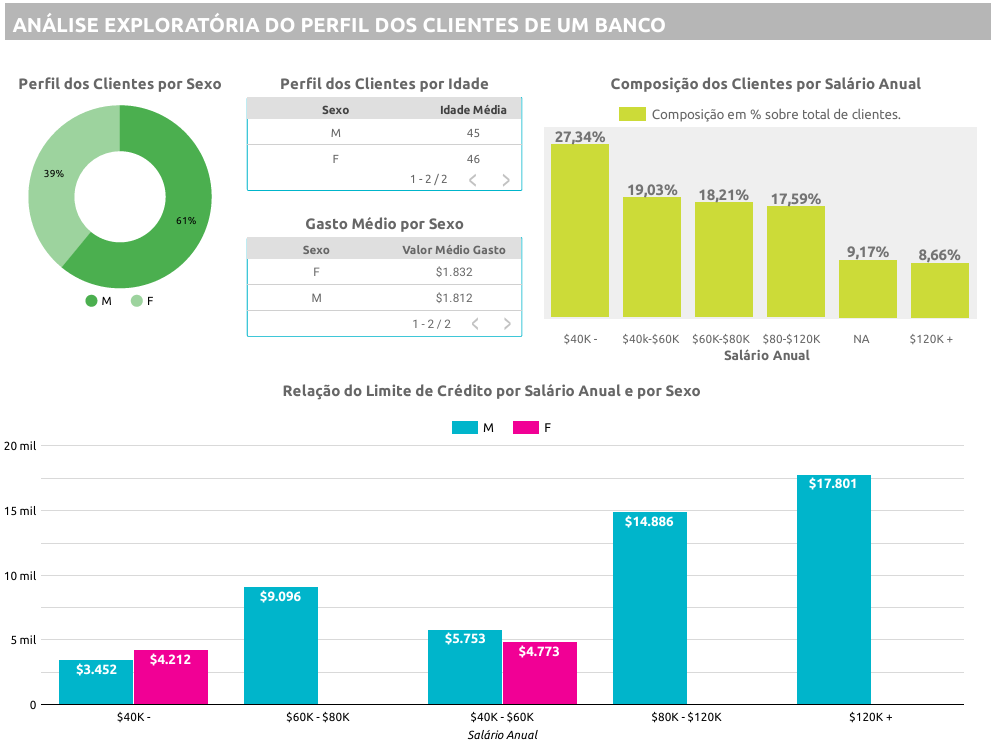

# 3. Considerações Finais

Nessa análise do perfil de clientes de um banco, observamos alguns insights importantes que podem impactar nas estratégias de marketing, alterar a oferta dos tipos de pacotes de serviços prestados, mudar valores das tarifas cobradas e adequação do serviço de atendimento ao cliente.

Em relação ao perfil dos clientes constata-se:
- presença significativa de dados do tipo "na", que indicam ausência de informação, e devem ser completados por uma equipe de relacionamento com o cliente a fim de prover as informações mais completas possíveis para embasar as ações do banco;
- o maior grupo de clientes por faixa salarial possui renda baixa;
- de forma ampla, os grupos de clientes de faixa salarial de renda baixa, renda média-baixa e renda média, compõe o maior percentual de clientes, o que pode influenciar no perfil do banco e nas suas principais campanhas publicitárias;
- um grupo considerável de clientes possui faixa salarial de renda média-alta, o que pode exigir uma abordagem diferenciada em relação a oferta de serviços;
- a maioria dos clientes é formada por homens;
- a média de idade dos clientes, em torno de 45 anos, é muito similar entre clientes do sexo masculino e do sexo feminino;
- não há diferença importante no comportamento de gastos comparado entre mulheres e homens;
- a renda influencia diretamente no limite de crédito concedido pelo banco, quanto maior a renda, maior o limite;
- não há presença feminina entre os clientes que possuem renda maior que $60K;
- o nível de escolaridade não desempenha influência significativa nos limites de crédito.

